<a href="https://colab.research.google.com/github/fbeilstein/presentations/blob/master/presentation_for_June_27_2023_lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title two neurons
%%html

<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/two_neurons.jpg" width=750>

In [ ]:
#@title activation functions
%%html

<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/activation_functions.jpg" width=750>

In [ ]:
#@title NN
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/399px-Colored_neural_network.svg.png">

**Modifications of simple gradient descent**

| Optimizer | Year | Learning rate $\alpha$ | Gradient $\nabla f$
|----|---|---|---
Standard  GD|1847 | ||
Momentum|1964| |               $\checkmark$ |
AdaGrad |2011| $\checkmark$ |               |
RMSprop |2011| $\checkmark$ |               |
Adadelta|2012| $\checkmark$ |               |
Nesterov|2013| |               $\checkmark$ |
Adam    |2014| $\checkmark$ | $\checkmark$|
AdaMax  |2015| $\checkmark$ | $\checkmark$|
Nadam   |2015| $\checkmark$ | $\checkmark$|
AMSGrad |2018| $\checkmark$ | $\checkmark$|

Here is a glossary
$$
\begin{aligned}
\text{AdaGrad} &= \text{adaptive gradient} \\
\text{RMSProp} &= \text{root mean square propagation} \\
\text{Adam} &= \text{adaptive movement} \\
\text{Nadam} &= \text{Nesterov + adam} \\
\text{Adadelta} &= \text{adaptive delta} \\
\end{aligned}
$$

In [ ]:
#@title #First order methods and challenging function ("Хто в ліс, хто по дрова...")


from IPython.display import display
import ipywidgets as widgets


class Memory:
  def __init__(self):
    self.x_ini = -2.5
    self.y_ini = -2.5
    self.iters = 30
    self.theta = 0.4

current_memory = Memory()



from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np


import tensorflow as tf
opt_adam = tf.keras.optimizers.Adam(learning_rate=current_memory.theta)
opt_sgd = tf.keras.optimizers.SGD(learning_rate=current_memory.theta)
opt_adadelta = tf.keras.optimizers.Adadelta(learning_rate=current_memory.theta)
opt_adagrad = tf.keras.optimizers.Adagrad(learning_rate=current_memory.theta)
opt_adamax = tf.keras.optimizers.Adamax(learning_rate=current_memory.theta)
opt_ftrl = tf.keras.optimizers.Ftrl(learning_rate=current_memory.theta)
opt_nadam = tf.keras.optimizers.Nadam(learning_rate=current_memory.theta)
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=current_memory.theta)



x_min = -3.0
x_max = 3.0
y_min = -3.0
y_max = 3.0

scatters = []

for opt, color, name in [[opt_adam, 'red', 'Adam'],
                         [opt_sgd, 'green', 'SGD'],
                         [opt_adadelta, 'blue', 'Adadelta'],
                         [opt_adagrad, 'yellow', 'Adagrad'],
                         [opt_adamax, 'orange', 'Adamax'],
                         [opt_ftrl, 'violet', 'FTRL'],
                         [opt_nadam, 'navy', 'Nadam'],
                         [opt_rmsprop, 'maroon', 'RMSprop']]:
  history = [np.array([current_memory.x_ini, current_memory.y_ini])]
  varx = tf.Variable(current_memory.x_ini)
  vary = tf.Variable(current_memory.y_ini)
  func_to_minimize = lambda: (varx**2 + vary**2) / 2.0 + tf.sin(4*varx)**2 #varx**2 + vary**2
  ftm = lambda x: (x[0]**2 + x[1]**2) / 2.0 + np.sin(4.0 * x[0])**2 #x[0]**2 + x[1]**2

  #O_basins_and_walls = (W**2).sum()/2 + T.sin(W[0][0]*4)**2

  for i in range(current_memory.iters):
    opt.minimize(func_to_minimize, [varx, vary])
    history.append([varx.numpy(), vary.numpy()])

  _h = np.array(history)
  _x = _h.T[0]
  _y = _h.T[1]
  _z = np.array([ftm(x) for x in history], dtype=float)

  x_min = min(x_min, np.min(_x))
  x_max = max(x_max, np.max(_x))
  y_min = min(y_min, np.min(_y))
  y_max = max(y_max, np.max(_y))

  scatters.append({'type': 'scatter',
                   'name': name, 'x': _x, 'y': _y,
                   'line': {'color': color, 'width': 2} })
  scatters.append({'type': 'scatter3d',
                  'name': name + ' (3D)', 'x': _x, 'y': _y, 'z': _z,
                  'line': {'color': color, 'width': 2}, 'marker': {'size': 4} })


def shorten(scatters, k):
  import copy
  new_scatters = copy.deepcopy(scatters)
  for s in new_scatters:
    s['x'] = s['x'][:k]
    s['y'] = s['y'][:k]
  return new_scatters

x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[ftm([x,y]) for x in x_] for y in y_], dtype=float)

import matplotlib.pyplot as plt
import base64
import io
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.axis('off')
ax.contourf(x_, y_, z_, alpha=0.3)
plt.close(fig)
buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
image_base64 = u'data:image/  png;base64,' + base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
buf.close()


fig = dict(
    layout = dict(
        width=1200, height=600, autosize=False,
        showlegend = True,
        scene = {'domain': { 'x': [0.0, 0.44], 'y': [0, 1] } },
        xaxis1 = {'domain': [0.55, 1], 'range': [x_min, x_max], 'fixedrange': True},
        yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max], 'fixedrange': True},
        title  = 'Minimization',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus = [{'buttons': [{'args': [[k for k in range(len(_h)-1)],
                                              {'frame': {'duration': 500.0, 'redraw': True},
                                              'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                    'label': 'Play',
                                    'method': 'animate'},
                                    {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                      'mode': 'immediate',
                                                      'transition': {'duration': 0}}
                                              ],
                                    'label': 'Pause',
                                    'method': 'animate'
                                    }
                                    ],
                        'direction': 'left',
                        'pad': {'r': 10, 't': 85},
                        'showactive': True,
                        'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
        sliders = [{'yanchor': 'top',
                    'xanchor': 'left',
                    'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': True, 'xanchor': 'right'},
                    'transition': {'duration': 0.0},
                    'pad': {'b': 10, 't': 50},
                    'len': 0.9,
                    'x': 0.1,
                    'y': 0,
                    'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                              'transition': {'duration': 0, 'easing': 'linear'}}
                                        ],
                              'label': k,
                              'method': 'animate'} for k in range(len(_h)-1)
                    ]}],
        images = [{'source' : image_base64,
                  'xref': 'x', 'yref': 'y',
                  'sizing': 'stretch',
                  'sizex': x_max - x_min, 'sizey': y_max - y_min,
                  'layer': 'below', 'opacity':1.0,
                  'x': x_min, 'y': y_max}]
    ),
    data = [
        #{'type': 'scatter3d', 'name': 's3', 'x': _x, 'y': _y, 'z': _z, 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
        {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
        #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
    ] + scatters,
    frames=[
        {'name': str(k),
        'data': [
          #{'type': 'scatter3d', 'name': 's3', 'x': _x[:k], 'y': _y[:k], 'z': _z[:k], 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
          {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
          #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
        ] + shorten(scatters, k+1) } for k in range(len(_h)-1) ]
)
f = go.Figure(fig)
f.show()

In [ ]:
#@title ##Back propagation (how to get gradient)
%%html

<div id="slide_1" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_1.jpg" width="750px">
</div>

<div id="slide_2" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_2.jpg" width="750px">
</div>

<div id="slide_3" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_3.jpg" width="750px">
</div>

<div id="slide_4" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_4.jpg" width="750px">
</div>

<div id="slide_5" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_5.jpg" width="750px">
</div>

<div id="slide_6" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_6.jpg" width="750px">
</div>

<div id="slide_7" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_7.jpg" width="750px">
</div>

<div id="slide_8" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_8.jpg" width="750px">
</div>

<div id="slide_9" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_9.jpg" width="750px">
</div>

<div id="slide_10" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_10.jpg" width="750px">
</div>

<div id="slide_11" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_11.jpg" width="750px">
</div>

<div id="slide_12" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_12.jpg" width="750px">
</div>

<div id="slide_13" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_13.jpg" width="750px">
</div>

<div id="slide_14" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_14.jpg" width="750px">
</div>

<div id="slide_15" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_15.jpg" width="750px">
</div>

<div id="slide_16" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_16.jpg" width="750px">
</div>

<div id="slide_17" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_17.jpg" width="750px">
</div>

<div id="slide_18" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_18.jpg" width="750px">
</div>

<div id="slide_19" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_19.jpg" width="750px">
</div>

<div id="slide_20" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_20.jpg" width="750px">
</div>


<div style="position:absolute; top:100px; left:800px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4",
               "slide_5", "slide_6",
              "slide_7", "slide_8", "slide_9",
              "slide_10", "slide_11", "slide_12",
              "slide_13", "slide_14", "slide_15",
              "slide_16", "slide_17", "slide_18",
              "slide_19", "slide_20"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var merging = false;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide != 5)
      merging = false;
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide == 5)
  {
    if (!merging)
      merge_images(200);
    merging = true;
  } else {
    merging = false;
  }
}

function image_opacity(image, opacity)
{
    var s = image.style;
    s.opacity = (opacity / 100);
    s.MozOpacity = (opacity / 100);
    s.KhtmlOpacity = (opacity / 100);
    s.filter = 'alpha(opacity=' + opacity + ')';
}

function merge_images(cycles_left)
{
  document.getElementById("cat").style.left = (200 - cycles_left) + "px";
  document.getElementById("pic").style.left = (400 - (200 - cycles_left)) + "px";
  image_opacity(document.getElementById("cat"), cycles_left / 2)
  image_opacity(document.getElementById("pic"), cycles_left / 2)
  image_opacity(document.getElementById("merge"), 100 - cycles_left / 2)
  if (cycles_left > 0)
    setTimeout(function(){merge_images(cycles_left - 1);}, 3);
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
#@title ##single neuron operation
%%html

<div id="slide_1" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/forward.jpg" width="750px">
</div>

<div id="slide_2" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward.jpg" width="750px">
</div>

<div id="slide_3" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward_two_outs.jpg" width="750px">
</div>


<div style="position:absolute; top:100px; left:800px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var merging = false;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide != 5)
      merging = false;
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide == 5)
  {
    if (!merging)
      merge_images(200);
    merging = true;
  } else {
    merging = false;
  }
}

function image_opacity(image, opacity)
{
    var s = image.style;
    s.opacity = (opacity / 100);
    s.MozOpacity = (opacity / 100);
    s.KhtmlOpacity = (opacity / 100);
    s.filter = 'alpha(opacity=' + opacity + ')';
}

function merge_images(cycles_left)
{
  document.getElementById("cat").style.left = (200 - cycles_left) + "px";
  document.getElementById("pic").style.left = (400 - (200 - cycles_left)) + "px";
  image_opacity(document.getElementById("cat"), cycles_left / 2)
  image_opacity(document.getElementById("pic"), cycles_left / 2)
  image_opacity(document.getElementById("merge"), 100 - cycles_left / 2)
  if (cycles_left > 0)
    setTimeout(function(){merge_images(cycles_left - 1);}, 3);
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
#@title ##NN example
%%html

<div id="slide_1" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_1.jpg" width="750px">
</div>

<div id="slide_2" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_2.jpg" width="750px">
</div>

<div id="slide_3" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_3.jpg" width="750px">
</div>

<div id="slide_4" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_4.jpg" width="750px">
</div>

<div id="slide_5" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_5.jpg" width="750px">
</div>

<div id="slide_6" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_6.jpg" width="750px">
</div>

<div id="slide_7" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_7.jpg" width="750px">
</div>

<div id="slide_8" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_8.jpg" width="750px">
</div>

<div id="slide_9" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_9.jpg" width="750px">
</div>

<div id="slide_10" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_10.jpg" width="750px">
</div>

<div id="slide_11" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_11.jpg" width="750px">
</div>

<div id="slide_12" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_12.jpg" width="750px">
</div>

<div id="slide_13" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_13.jpg" width="750px">
</div>

<div id="slide_14" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_14.jpg" width="750px">
</div>

<div id="slide_15" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_15.jpg" width="750px">
</div>

<div id="slide_16" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_16.jpg" width="750px">
</div>

<div id="slide_17" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_17.jpg" width="750px">
</div>

<div id="slide_18" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_18.jpg" width="750px">
</div>

<div id="slide_19" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_19.jpg" width="750px">
</div>

<div id="slide_20" style="display:none; max-width:750px">
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_20.jpg" width="750px">
</div>


<div style="position:absolute; top:100px; left:800px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4",
               "slide_5", "slide_6",
              "slide_7", "slide_8", "slide_9",
              "slide_10", "slide_11", "slide_12",
              "slide_13", "slide_14", "slide_15",
              "slide_16", "slide_17", "slide_18",
              "slide_19", "slide_20"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var merging = false;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide != 5)
      merging = false;
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide == 5)
  {
    if (!merging)
      merge_images(200);
    merging = true;
  } else {
    merging = false;
  }
}

function image_opacity(image, opacity)
{
    var s = image.style;
    s.opacity = (opacity / 100);
    s.MozOpacity = (opacity / 100);
    s.KhtmlOpacity = (opacity / 100);
    s.filter = 'alpha(opacity=' + opacity + ')';
}

function merge_images(cycles_left)
{
  document.getElementById("cat").style.left = (200 - cycles_left) + "px";
  document.getElementById("pic").style.left = (400 - (200 - cycles_left)) + "px";
  image_opacity(document.getElementById("cat"), cycles_left / 2)
  image_opacity(document.getElementById("pic"), cycles_left / 2)
  image_opacity(document.getElementById("merge"), 100 - cycles_left / 2)
  if (cycles_left > 0)
    setTimeout(function(){merge_images(cycles_left - 1);}, 3);
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

# Example SimpleRandomNet

((1347, 8, 8, 1), (1347, 10))

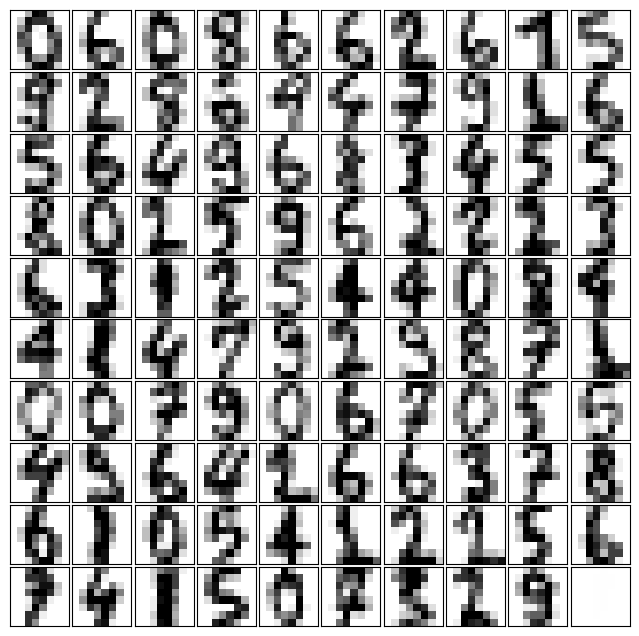

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

digits = load_digits()
X_all = digits.data.reshape(digits.data.shape[0], 8, 8, 1).astype(float) / 256.0

X_train, X_test, y_train, y_test =  train_test_split(X_all,
                                                     digits.target,
                                                     train_size=0.75,
                                                     shuffle=True)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

def plot_digits(data):
  fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(hspace=0.05, wspace=0.05)
  for i, axi in enumerate(ax.flat):
    im = axi.imshow(data[i,:,:,0], cmap='binary')
  im.set_clim(0, 16)

plot_digits(X_train)
X_train.shape, y_train.shape

In [ ]:
from keras.backend import binary_crossentropy
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D


class RandNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()

    self.add(Conv2D(6, kernel_size=(3, 3), strides=(1, 1),
                    activation='tanh',
                    input_shape=input_shape, padding="same"))
    self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(Flatten())
    self.add(Dense(nb_classes, activation='softmax'))

    self.compile(optimizer='adam',
                loss=categorical_crossentropy,
                metrics=['accuracy'])

model = RandNet(X_train[0].shape, 10)
model.summary()

Model: "rand_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 8, 8, 6)           60        
                                                                 
 average_pooling2d_13 (Avera  (None, 4, 4, 6)          0         
 gePooling2D)                                                    
                                                                 
 flatten_7 (Flatten)         (None, 96)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                970       
                                                                 
Total params: 1,030
Trainable params: 1,030
Non-trainable params: 0
_________________________________________________________________


**Categorical cross-entropy** loss function $L$ is computed as follows
$$
L = \sum_i t_i \ln(s_i),
$$
where $t_i$ are truth values and $s_i$ are **softmax** outputs
$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \text{ for } i = 1, \dotsc, K \text{ and } \mathbf{z} = (z_1, \dotsc, z_K) \in \mathbb{R}^K.
$$
In our case $t_i$ are either $0$ or $1$ (see `to_categorical` function). We may have used `sparse_crossentropy`, same function different class encoding.

In [ ]:
%load_ext tensorboard
!rm -rf logs/fit
%tensorboard --logdir logs/fit

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

In [ ]:
import datetime
import tensorflow as tf
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(X_train, y=y_train,
          epochs=400,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback],
          verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), #true
                 np.argmax(model.predict(X_test), axis=1)   #predicted
                )

15/15 [==============================] - 0s 2ms/step


array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  1,  1,  1,  0,  1,  0,  1,  1],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 54,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  1,  1, 36]])

15/15 [==============================] - 0s 2ms/step
INPUT:


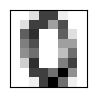

CONVOLUTION:


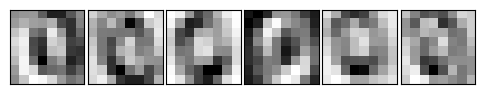

AVERAGE POOL:


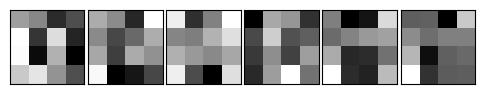

OUTPUT:
[9.9984503e-01 8.1749324e-10 1.2936160e-05 1.4540603e-07 1.5103997e-07
 1.1379132e-05 1.2623756e-04 9.0360108e-10 4.0174536e-06 1.3020770e-07]


In [ ]:
input = X_test
idx = 0

import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

conv_outs = K.function(inputs=model.input,
                       outputs=model.layers[0].output)(input)
pool_outs = K.function(inputs=model.input,
                       outputs=model.layers[1].output)(input)
model_outs = model.predict(input)


print("INPUT:")
fig, ax = plt.subplots(1, 1, figsize=(1, 1), subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(input[idx], cmap='binary')
plt.show()

print('CONVOLUTION:')
fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
  axi.imshow(conv_outs[idx, :, :, i], cmap='binary')
plt.show()

print('AVERAGE POOL:')
fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
  axi.imshow(pool_outs[idx, :, :, i], cmap='binary')
plt.show()

print('OUTPUT:')
print(model_outs[idx]);

## Pytorch NN

In [ ]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from torch import nn
from torch.optim import Adam
from torch.utils.data import Dataset, Dataloader

In [ ]:
class ArrayData(Dataset):
  def __init__(self, X: np.ndarray, Y: np.ndarray):
    self.data = torch.tensor(X, dtype=torch.float32)
    self.y = torch.tensor(Y, dtype=torch.float32)

  def __len__(self) -> int:
    return len(self.data)

  def __getitem__(self, ix: int) -> Tuple[torch.Tensor, torch.Tensor]:
    return self.data[ix], self.y[ix]

digits = load_digits()
X_all = digits.data.reshape(digits.data.shape[0], 8, 8, 1).astype(float) / 256.0

X_train, X_test, y_train, y_test =  train_test_split(X_all,
                                                     digits.target,
                                                     train_size=0.75,
                                                     shuffle=True)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
print(X_train.shape, y_train.shape)

dataset = ArrayData(X_train.reshape(-1, 1, 8, 8), y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

dataset_test = ArrayData(X_test.reshape(-1, 1, 8, 8), y_test)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

In [ ]:
class Net(nn.Module):
  def __init__(self, input_res: int, num: int):
    nn.Module.__init__(self)
    self.conv_layers = nn.Sequential(*([self._conv_bn_relu(1, 8, 3, padding=1)] + [
        self._conv_bn_relu(8, 8, 3, padding=1) for _ in range(num - 2)
    ] + [nn.Conv2d(8, 16, 8, bias=True)] + [nn.Conv2d(16, 10, 1, bias=True)]))

  def _conv_bn_relu(self, in_channels, out_channels, kernel_size,
                    stride=1, padding=0, dilation=1, groups=1,
                    padding_mode='zeros', device=None, dtype=None,
                    momentum=0.1, eps=1e-05, affine=True,
                    track_running_stats=True):
    return nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                  kernel_size=kernel_size, stride=stride, padding=padding,
                  dilation=dilation, groups=groups, bias=False,
                  padding_mode=padding_mode, device=device, dtype=dtype),
        nn.BatchNorm2d(num_features=out_channels, eps=eps, momentum=momentum,
                       affine=affine, track_running_stats=track_running_stats,
                       device=device, dtype=dtype),
        nn.ReLU(inplace=True)
    )

  def _get_layers_list(self, input_layers):
    layers_list = []
    if isinstance(input_layers, nn.Sequential):
      for layer in input_layers:
        layers_list += self._get_layers_list(layer)
    else:
      layers_list.append(input_layers)
    return layers_list

  def forward_from_layers(self, x: torch.Tensor) -> torch.Tensor:
    layers = self._get_layers_list(self.conv_layers)

    output_layers_preds = [x.detach().clone()]
    curr_x = x
    for layer in layers:
      curr_x = layer(curr_x)
      output_layers_preds.append(curr_x.detach().clone())
    logits = curr_x

    return logits, output_layers_preds

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    logits = self.conv_layers(x)
    return logits


net = Net(8, 3)

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = Adam(params=net.parameters(), lr=1e-3)

In [ ]:
for epoch in range(101):
  for x, y in dataloader:
    optimizer.zero_grad()
    pred = net(x)
    l = loss(pred.view(x.shape[0], -1), y)
    if epoch % 50 == 0:
      print("Loss:", l.detach().item())
    l.backward()
    optimizer.step()

In [ ]:
def accuracy(pred: torch.Tensor, target: torch.Tensor):
    assert len(pred.shape) == 2
    assert pred.shape == target.shape
    pred_max_idxs = torch.argmax(pred, dim=1)
    target_max_idxs = torch.argmax(target, dim=1)
    TP = torch.sum(pred_max_idxs == target_max_idxs)
    return TP / pred.shape[0]

In [ ]:
with torch.no_grad():
  net.eval()  # Freeze batch norm statistics
  for x, y in dataloader_test:
    pred_y1, layers_preds1 = net.forward_from_layers(x[:1])
    break

In [ ]:
for layer_pred in layers_preds1:
  print(layer_pred.shape)

torch.Size([1, 1, 8, 8])
torch.Size([1, 8, 8, 8])
torch.Size([1, 8, 8, 8])
torch.Size([1, 8, 8, 8])
torch.Size([1, 8, 8, 8])
torch.Size([1, 8, 8, 8])
torch.Size([1, 8, 8, 8])
torch.Size([1, 16, 1, 1])
torch.Size([1, 10, 1, 1])


In [ ]:
def normalize(x: np.ndarray) -> np.ndarray:
  x = x - np.min(x)
  x *= 255 / np.max(x)
  return x.astype(np.uint8)

In [ ]:
normed_channel = normalize(layers_preds1[4].numpy()[0, 10])


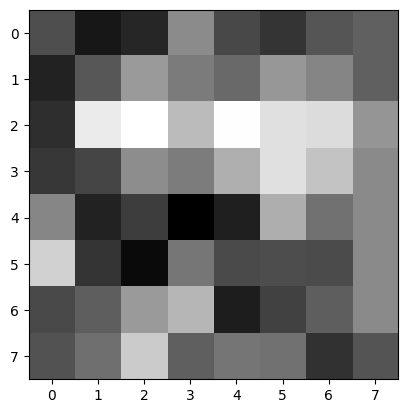

In [ ]:
plt.imshow(np.stack([normed_channel] * 3, axis=2))

In [ ]:
with torch.no_grad():
  net.eval()  # Freeze batch norm statistics
  for x, y in dataloader_test:
    prob = F.softmax(net(x).view(-1, 10))
    acc = accuracy(prob, y)
    print(acc)
    break

tensor(0.9911)


<ipython-input-54-92ea29bfdb8f>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = F.softmax(net(x).view(-1, 10))


In [ ]:
y_test.shape[0] - 0.9911 * y_test.shape[0]

4.0049999999999955

In [ ]:
F.softmax(net(dataset[0][0]).view())

tensor(2.2882)

In [ ]:
with torch.no_grad():
  X = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 8, 8)
  Y = net(X[:4])

<ipython-input-4-285e09e00163>:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(logits.view(x.shape[0], -1))


In [ ]:
X_train.shape

(1347, 8, 8, 1)

In [ ]:
Y.shape

torch.Size([4, 10])

In [ ]:
a = torch.ones((4, ))

# Variational Autoencoder

![img](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

Autoencoders are in some sense close to PCA. One-layer autoencoder witout activation will basically perform linear transform

In [ ]:
#@title Manual PCA
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_12_principal_component_analysis/demo_pca.html"
        width="800" height="450"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

digits = load_digits()
X_all = digits.data.reshape(digits.data.shape[0], 8, 8, 1).astype(float) / 16.0

X_train, X_test, y_train, y_test =  train_test_split(X_all,
                                                     digits.target,
                                                     train_size=0.75,
                                                     shuffle=True)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
X_train.shape, y_train.shape

((1347, 8, 8, 1), (1347, 10))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy, MeanSquaredError
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, UpSampling2D, Conv2DTranspose


class AutoEncoder(Model):
  def __init__(self, repr_dim):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(8, 8, 1)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(repr_dim, (3, 3), activation=None, padding='same', strides=(2,2))])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    self.compile(optimizer='adam',
            loss=MeanSquaredError(),
            metrics=['accuracy'])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AutoEncoder(3)
autoencoder.build(X_train.shape)
print('ALL:')
autoencoder.summary()
print('ENCODER:')
autoencoder.encoder.summary()
print('DECODER:')
autoencoder.decoder.summary()

ALL:
Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_24 (Sequential)  (None, 1, 1, 3)           6323      
                                                                 
 sequential_25 (Sequential)  (1347, 8, 8, 1)           1721      
                                                                 
Total params: 8,044
Trainable params: 8,044
Non-trainable params: 0
_________________________________________________________________
ENCODER:
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 8, 8, 32)          320       
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 16)          4624      
                                                                 
 conv2d_54 (Con

In [ ]:
autoencoder.fit(X_train, y=X_train,
               epochs=200,
               validation_data=(X_test, X_test),
               #callbacks=[tensorboard_callback],
               verbose=0)

encoded_imgs = autoencoder.encoder(X_train).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
encoded_imgs.shape, decoded_imgs.shape

In [ ]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
#colors = [cmap[int(d)] for d in np.argmax(y_train, axis=1)]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])
proj = encoded_imgs[:,0,0,:]
classes = np.argmax(y_train, axis=1)
for num in range(10):
  p = proj[classes == num]
  fig.add_trace(go.Scatter3d(x=p[:, 0], y=p[:, 1], z=p[:, 2],
                            mode='markers', name=str(num),
                            marker=dict(size=4, color=cmap[num])),
                row=1, col=1)


fig.update_layout(width=600, height=600, autosize=False,
                  title_text="autoencoder's latent space",
                  scene={"xaxis": {"title": "component 1"},
                         "yaxis": {"title": "component 2"},
                         "zaxis": {"title": "component 3"}},
                  showlegend=True)

fig.show()

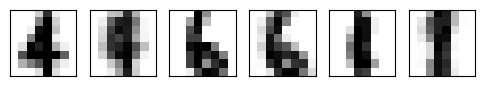

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(X_train[42,:,:,0], cmap='binary')
ax[1].imshow(decoded_imgs[42,:,:,0], cmap='binary')
ax[2].imshow(X_train[17,:,:,0], cmap='binary')
ax[3].imshow(decoded_imgs[17,:,:,0], cmap='binary')
ax[4].imshow(X_train[145,:,:,0], cmap='binary')
ax[5].imshow(decoded_imgs[145,:,:,0], cmap='binary')
plt.show()

![img](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*iSfaVxcGi_ELkKgAG0YRlQ@2x.png)

![img](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*83S0T8IEJyudR_I5rI9now@2x.png)

![img](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*eRcdr8gczweQHk--1pZF9A@2x.png)

# GAN

In [ ]:
#@title ##GAN style transfer
%%html


<div id="slide_6" style="display:none; max-width:750px; height:200px;">
  <img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_01_introduction/Cat.jpg"
  style="position:absolute; left:0px;  top:0px;">
  <img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_01_introduction/Candinsky.jpg"
  style="position:absolute; left:400px; top:0px;">
</div>

<div id="slide_7" style="display:none; max-width:750px; height:200px;">
  <img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_01_introduction/Cat.jpg"
  style="position:absolute; left:0px;  top:0px;" id="cat">
  <img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_01_introduction/CandinskyCat.jpg"
  style="position:absolute; left:200px; top:0px;" id="merge">
  <img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_01_introduction/Candinsky.jpg"
  style="position:absolute; left:400px; top:0px;" id="pic">
</div>



<div style="position:absolute; top:100px; left:800px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_6", "slide_7"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var merging = false;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide != 5)
      merging = false;
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
  if (current_slide == 1)
  {
    if (!merging)
      merge_images(200);
    merging = true;
  } else {
    merging = false;
  }
}

function image_opacity(image, opacity)
{
    var s = image.style;
    s.opacity = (opacity / 100);
    s.MozOpacity = (opacity / 100);
    s.KhtmlOpacity = (opacity / 100);
    s.filter = 'alpha(opacity=' + opacity + ')';
}

function merge_images(cycles_left)
{
  document.getElementById("cat").style.left = (200 - cycles_left) + "px";
  document.getElementById("pic").style.left = (400 - (200 - cycles_left)) + "px";
  image_opacity(document.getElementById("cat"), cycles_left / 2)
  image_opacity(document.getElementById("pic"), cycles_left / 2)
  image_opacity(document.getElementById("merge"), 100 - cycles_left / 2)
  if (cycles_left > 0)
    setTimeout(function(){merge_images(cycles_left - 1);}, 3);
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
#@title generative model
%%html
<img width=750 src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*CkMMefLPqcEKPuuPLZY2_A.png">

In [ ]:
#@title direct training
%%html
<img width=750 src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*Pg-z4jKFyHtIMvcQWefLSQ.png">

In [ ]:
#@title indirect training
%%html
<img width=750 src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*t82vgL9KcDVpT4JqCb9Q4Q.png">

for details see "*Generative Adversarial Nets*" by Ian J. Goodfellow et all.


**for** number of training iterations **do**

$~~~~$**for** $k$ steps **do**

$~~~~$$~~~~$• Sample minibatch of $m$ noise samples $\{z^{(1)},\dots,z^{(m)}\}$ from noise prior $p_g(z)$.

$~~~~$$~~~~$• Sample minibatch of $m$ examples $\{x^{(1)},\dots,x^{(m)}\}$ from data generating distribution $p_\text{data}(x)$.

$~~~~$$~~~~$• Update the discriminator by ascending its stochastic gradient:
$$
\nabla_{\theta_d} \frac{1}{m} \sum_{i=1}^m \left[ \ln D (x^{(i)}) + \ln \left( 1 - D(G(z^{(i)})) \right)\right]
$$
$~~~~$**end for**

$~~~~$• Sample minibatch of $m$ noise samples $\{z^{(1)},\dots,z^{(m)}\}$ from noise prior $p_g(z)$.

$~~~~$• Update the generator by descending its stochastic gradient:
$$
\nabla_{\theta_g} \frac{1}{m} \sum_{i=1}^m \ln \left( 1 - D(G(z^{(i)})) \right)
$$

**end for**

11490434/11490434 [==============================] - 0s 0us/step


epoch: 1; G_loss: 0.734805; D_loss: 1.538191


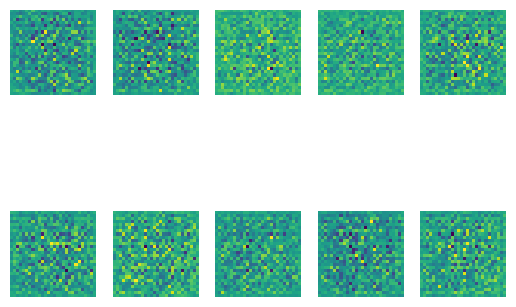

epoch: 101; G_loss: 0.904694; D_loss: 1.068937


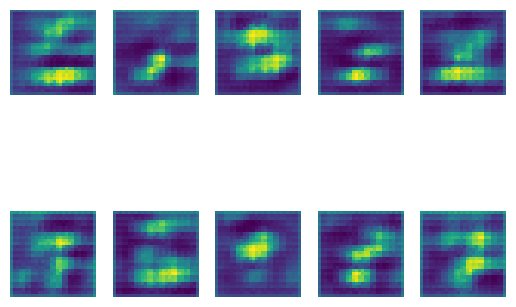

epoch: 201; G_loss: 0.807740; D_loss: 1.158133


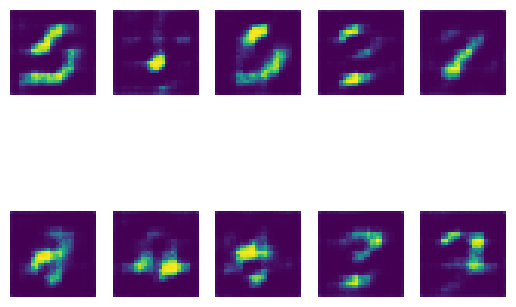

epoch: 301; G_loss: 0.774072; D_loss: 1.253937


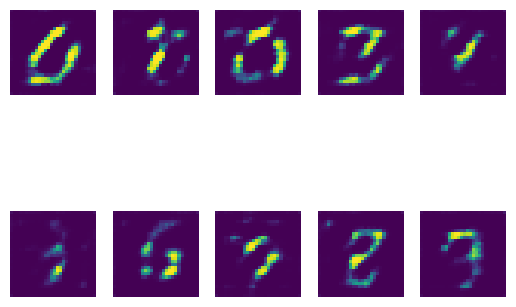

epoch: 401; G_loss: 0.809720; D_loss: 1.238696


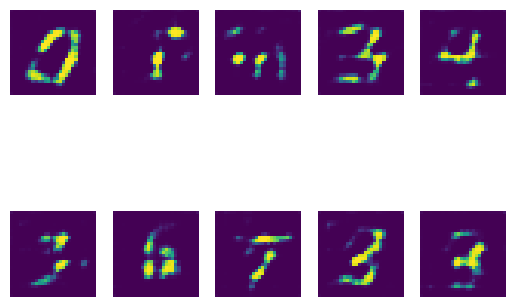

epoch: 501; G_loss: 0.872223; D_loss: 1.161595


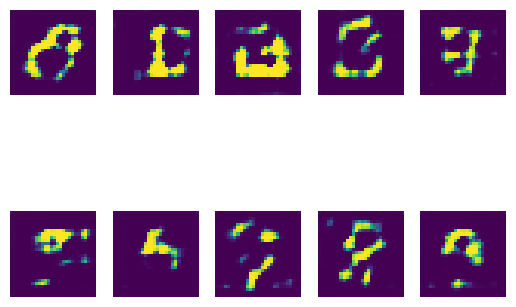

epoch: 601; G_loss: 0.851898; D_loss: 1.205442


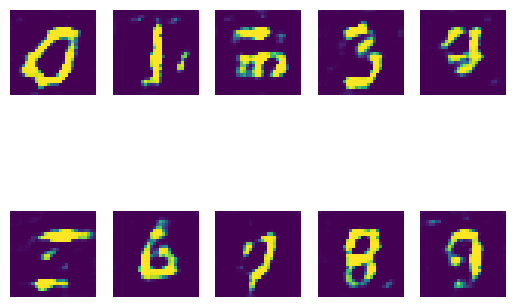

epoch: 701; G_loss: 0.911330; D_loss: 1.099239


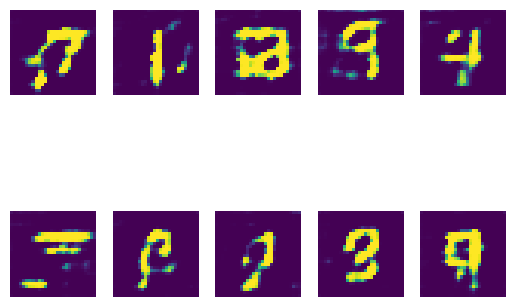

epoch: 801; G_loss: 0.902994; D_loss: 1.090185


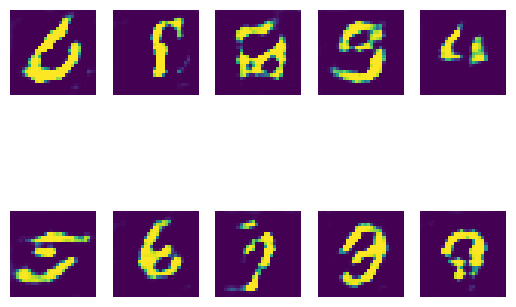

epoch: 901; G_loss: 0.820778; D_loss: 1.188131


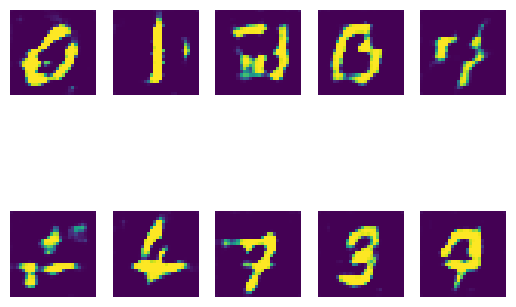

epoch: 1001; G_loss: 0.972899; D_loss: 0.990790


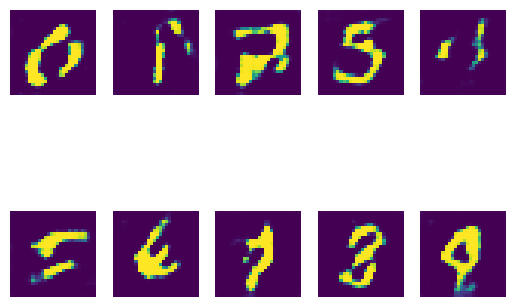

epoch: 1101; G_loss: 0.946880; D_loss: 1.069643


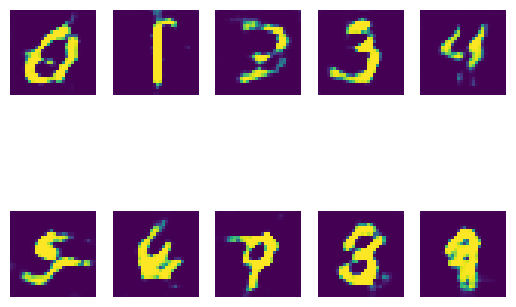

epoch: 1201; G_loss: 0.852598; D_loss: 1.134953


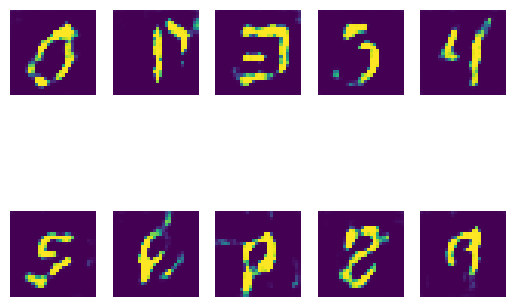

epoch: 1301; G_loss: 0.896217; D_loss: 1.140986


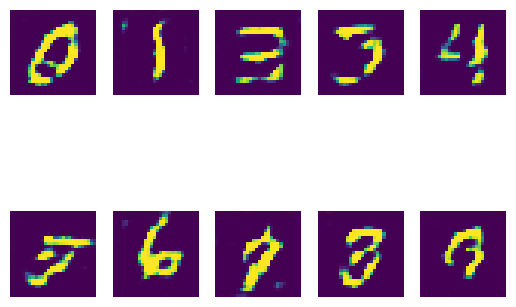

epoch: 1401; G_loss: 0.932549; D_loss: 1.116904


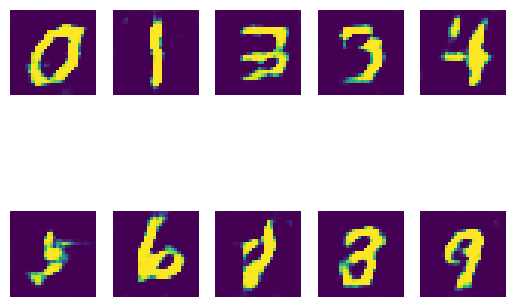

epoch: 1501; G_loss: 0.919742; D_loss: 1.066552


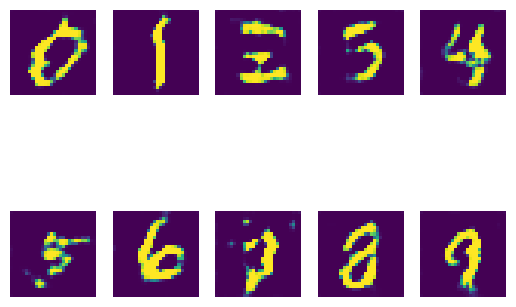

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

batch_size = 200
epochs = 20000
z_dim = 100

# Noise for visualization
z_vis = tf.random.normal([10, z_dim])
y_vis = tf.constant(np.eye(10), dtype='float32')

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
y_train = tf.one_hot(y_train, depth=10, dtype='float32')
data_iter = iter(tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(4 * batch_size).batch(batch_size).repeat())


# Models
def Generator():
  z = tf.keras.layers.Input(shape=(z_dim,), dtype='float32')
  y = tf.keras.layers.Input(shape=(10,), dtype='float32')
  tr = tf.keras.layers.Input(shape=(1,), dtype='bool')

  x = tf.keras.layers.concatenate([z, y])
  x = tf.keras.layers.Dense(3 * 3 * 512)(x)
  x = tf.keras.layers.Reshape((3, 3, 512))(x)

  x = tf.keras.layers.Conv2DTranspose(256, 3, 2, 'valid')(x)
  x = tf.nn.leaky_relu(tf.keras.layers.BatchNormalization()(x, training=tr))

  x = tf.keras.layers.Conv2DTranspose(128, 4, 2, 'same')(x)
  x = tf.nn.leaky_relu(tf.keras.layers.BatchNormalization()(x, training=tr))

  x = tf.keras.layers.Conv2DTranspose(1,  4, 2, 'same', activation='sigmoid')(x)
  out = tf.keras.layers.Reshape((28, 28))(x)

  return tf.keras.Model(inputs=[z, y, tr], outputs=out)


def Discriminator():
  X = tf.keras.layers.Input(shape=(28, 28), dtype='float32')
  Y = tf.keras.layers.Input(shape=(10,), dtype='float32')
  tr = tf.keras.layers.Input(shape=(1,), dtype='bool')

  y = tf.tile(tf.reshape(Y,[-1, 1, 1, 10]), [1, 28, 28, 1])
  x = tf.keras.layers.Reshape((28, 28, 1))(X)
  x = tf.keras.layers.concatenate([x, y])

  x = tf.keras.layers.Conv2D(128,  4, 2, 'same')(x)

  x = tf.keras.layers.Conv2D(256,  4, 2, 'same')(x)
  x = tf.nn.leaky_relu(tf.keras.layers.BatchNormalization()(x, training=tr))

  x = tf.keras.layers.Conv2D(512, 4, 2, 'same')(x)
  x = tf.nn.leaky_relu(tf.keras.layers.BatchNormalization()(x, training=tr))

  out = tf.keras.layers.Dense(1)(x)

  return tf.keras.Model(inputs=[X, Y, tr], outputs=out)


G = Generator()
D = Discriminator()

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake, y):
  return cross_entropy(tf.ones_like(D([x_fake, y, True])), D([x_fake, y, True]))
def D_loss(D, x_real, x_fake, y):
  return cross_entropy(tf.ones_like(D([x_real, y, True])), D([x_real, y, True])) \
      + cross_entropy(tf.zeros_like(D([x_fake, y, True])), D([x_fake, y, True]))

# Optimizers
G_opt = tf.keras.optimizers.Adam(2e-4)
D_opt = tf.keras.optimizers.Adam(2e-4)

# Train
for epoch in range(epochs):
  z_mb = tf.random.normal([batch_size, z_dim])
  x_real, y = next(data_iter)
  # Record operations
  with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:
    x_fake = G([z_mb, y, True])
    G_loss_curr = G_loss(D, x_fake, y)
    D_loss_curr = D_loss(D, x_real, x_fake, y)
  # Gradients
  G_grad = G_tape.gradient(G_loss_curr, G.trainable_variables)
  D_grad = D_tape.gradient(D_loss_curr, D.trainable_variables)
  # Apply gradients
  G_opt.apply_gradients(zip(G_grad, G.trainable_variables))
  D_opt.apply_gradients(zip(D_grad, D.trainable_variables))

  if epoch % 100 == 0:
    # Print results
    print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
    # Plot generated images
    for i in range(10):
      plt.subplot(2, 5, i+1)
      plt.imshow(G([z_vis, y_vis, False])[i,:,:] * 255.0)
      plt.axis('off')
    plt.show()